# 4-1 로지스틱 회귀

이제 한빛 마케팅팀은 특정 물고기 확률 럭키백을 출시한다!!

In [ ]:
import pandas as pd

In [ ]:
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

In [ ]:
print(pd.unique(fish['Species']))

In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [ ]:
fish_input[:5]

In [ ]:
fish_target = fish['Species'].to_numpy()

In [ ]:
fish_target[:5]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
ss.fit(train_input) 
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

In [ ]:
print(kn.classes_) #unique는 알파벳 순서대로, classese_는 훈련 데이터 클래스가 나오는 순서대로 

In [37]:
print(kn.predict((test_scaled[:5])))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
import numpy as np 
proba = kn.predict_proba(test_scaled[:5])

In [ ]:
print(np.round(proba, decimals=4)) #참고로 출력값은 classe_순임

In [38]:
distances, indexs = kn.kneighbors(test_scaled[3:4]) #세번째 샘플에 대해서 거리, 인덱스를 출력함 
print(train_target[indexs]) #무게, 길이, 두께등의 정보가 있는 3번째 샘플에 대해 그 주변에 있는 index(물고기) 가 뭐가 있는지 판단

[['Roach' 'Perch' 'Perch']]


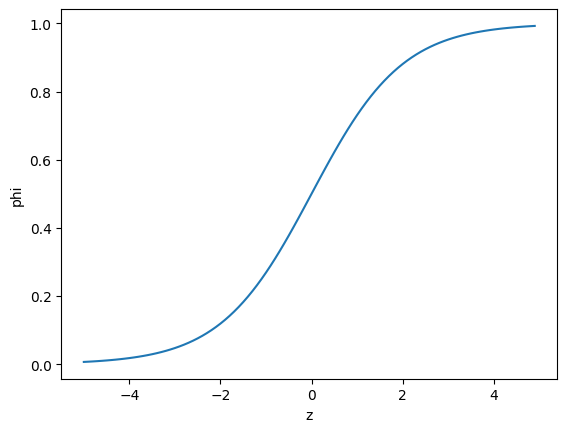

In [41]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5,5,0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

시그모이드 함수를 사용해서 0-1사이값만 써야 됨(확률 값이니까!)
이진 분류일 경우 시그모이드 함수값이 0.5보다 크면 양성 클래서 0.5거나 0.5보다 작으면 음성 클래스로 분류함

In [42]:
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [44]:
bream_smelt_indexs = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexs]
target_bream_smelt = train_target[bream_smelt_indexs]

In [50]:
target_bream_smelt #True 값인 도미와 빙어에 관련 된 것만 나온 것을 알 수 있음

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [47]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [51]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


첫번 째 열이 음성 클래스(0)에 대한 확률이고 두번째 열이 양성 클래스(1)에 대한 확률이다 (일반적으로)  
근데 뭐가 빙어고 도미인지 알 수 없으니 classes_로 확인해보자

In [57]:
print(lr.classes_) 

['Bream' 'Smelt']


In [59]:
print(lr.coef_, lr.intercept_) 

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


로지스틱 회귀 모델이 학습한 방정식은 다음과 같다!  
![로지스틱 회귀 모델](https://docs-us.oss-us-west-1.aliyuncs.com/img/blog-cover-images/logistic-regression.png)

사진에서 보면 이제 Xi에 들어갈 것이, Weight, Length... 이 되고 맨 마지막 상수가 -2.16172774이게 되는 것이다!


In [62]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions) #이 값들이 5개 샘플에 대한 결과값인 Y라고 볼 수 있다!

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


이제 이 값들을 시그모이드 함수에 통과시키면 확률을 얻을 수 있다

In [63]:
from scipy.special import expit
print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


이 값들을 살펴보면 predict_proba()매세트 출력의 두 번째 열의 값과 동일하다 즉 dicision_function() 메서드는  
양성 클래스에 대한 Y값을 반환하게 된다!

In [65]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [67]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [74]:
proda = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.667 0.    0.333 0.    0.   ]
 [0.    0.    0.667 0.    0.333 0.    0.   ]]


In [75]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [76]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


다중 분류에서는 시그모이드 함수가 아닌 소프트맥스 함수를 사용한다! 
시그모이드는 하나의 선형 방정식을 0-1로 압축
소프트맥스는 여러개의 선형 방정식을 0-1로 압축하고 전체 합이 1이 되도록 만듦
![소프트맥스](https://camo.githubusercontent.com/a86433e3144d926be824ce244637aa992eb594e229105b44263c8860e2b8aac9/68747470733a2f2f74312e6461756d63646e2e6e65742f6366696c652f746973746f72792f393936344238343935433832304433363038)

In [78]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [79]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
